##2. Niche Supplement Data Exploration (NLP Focus)

This notebook is focused on the data used to train the Niche Profiler Agent, primarily looking at the structure and content of the captions.

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import re
import os
import kagglehub
import glob
import seaborn as sns
from typing import List

# --- Utility Functions from ingest_public_data.py ---

# Define Kaggle Dataset ID for Niche data
KAGGLE_DATASETS = {"niche_supplement": "prithvijaunjale/instagram-images-with-captions"}

def find_csv_in_path(path: str) -> str:
    """Finds the first CSV file in the downloaded Kaggle path."""
    csv_files = glob.glob(os.path.join(path, '**', '*.csv'), recursive=True)
    if not csv_files:
        raise FileNotFoundError(f"No CSV file found in the downloaded path: {path}")
    return csv_files[0]

In [24]:
def download_and_load(dataset_name: str) -> pd.DataFrame:
    """Downloads a Kaggle dataset and loads the primary CSV file."""
    dataset_id = KAGGLE_DATASETS[dataset_name]
    print(f"--- Starting Download: {dataset_id} ---")
    download_path = kagglehub.dataset_download(dataset_id)
    csv_file_path = find_csv_in_path(download_path)
    df = pd.read_csv(csv_file_path, low_memory=False)
    print(f"Loaded {len(df)} records.")
    return df

# Load the Niche Supplement data
niche_df = download_and_load("niche_supplement")

--- Starting Download: prithvijaunjale/instagram-images-with-captions ---
Loaded 20515 records.


In [25]:
df = niche_df.copy()

In [26]:
df

,Sr No,Image File,Caption
0,1,img/insta1,NaN
1,2,img/insta2,bye
2,3,img/insta3,"Ok, a few more... sorry I just had so much fun..."
3,4,img/insta4,This was one of my favorite shoots I’ve ever d...
4,5,img/insta5,Wrapped round my finger like a ring
...,...,...,...
20510,20511,img/insta20511,Cowgirl :)
20511,20512,img/insta20512,<3
20512,20513,img/insta20513,I love me and Kylie's nail polish colors!
20513,20514,img/insta20514,Fammm


In [27]:
df.describe(include='all')

,Sr No,Image File,Caption
count,20515.000000,20515,17100
unique,NaN,20515,15652
top,NaN,img/insta20515,❤
freq,NaN,1,51
mean,10258.000000,NaN,NaN
std,5922.314722,NaN,NaN
min,1.000000,NaN,NaN
25%,5129.500000,NaN,NaN
50%,10258.000000,NaN,NaN
75%,15386.500000,NaN,NaN


In [28]:
df.dtypes

Sr No          int64
Image File    object
Caption       object
dtype: object

In [29]:
print(df.loc[df['Caption'].isna()].shape[0])
print(df.loc[df['Image File'].isna()].shape[0])

3415
0


In [30]:
"""Prepare the 14k Niche Supplement data."""
print(f"Niche Supplement data shape: {df.shape}")
df = df.rename(columns={'Caption': 'caption', 'Image File': 'image_file_name'})
df = df.dropna(subset=['caption', 'image_file_name'])
print(f"Processed Niche Supplement data shape: {df.shape}")

Niche Supplement data shape: (20515, 3)
Processed Niche Supplement data shape: (17100, 3)


In [31]:
print(df.loc[df['caption'].isna()].shape[0])
print(df.loc[df['image_file_name'].isna()].shape[0])

0
0


In [32]:
df

,Sr No,image_file_name,caption
1,2,img/insta2,bye
2,3,img/insta3,"Ok, a few more... sorry I just had so much fun..."
3,4,img/insta4,This was one of my favorite shoots I’ve ever d...
4,5,img/insta5,Wrapped round my finger like a ring
5,6,img/insta6,Yesterday was so much fun!! has been such a hu...
...,...,...,...
20510,20511,img/insta20511,Cowgirl :)
20511,20512,img/insta20512,<3
20512,20513,img/insta20513,I love me and Kylie's nail polish colors!
20513,20514,img/insta20514,Fammm


In [33]:
df.describe(include='all')

,Sr No,image_file_name,caption
count,17100.000000,17100,17100
unique,NaN,17100,15652
top,NaN,img/insta20515,❤
freq,NaN,1,51
mean,10199.106667,NaN,NaN
std,5972.082549,NaN,NaN
min,2.000000,NaN,NaN
25%,5266.750000,NaN,NaN
50%,9930.500000,NaN,NaN
75%,15681.250000,NaN,NaN


In [34]:
print(df.head())
print(df.info())

   Sr No image_file_name                                            caption
1      2      img/insta2                                               bye 
2      3      img/insta3  Ok, a few more... sorry I just had so much fun...
3      4      img/insta4  This was one of my favorite shoots I’ve ever d...
4      5      img/insta5               Wrapped round my finger like a ring 
5      6      img/insta6  Yesterday was so much fun!! has been such a hu...
<class 'pandas.core.frame.DataFrame'>
Index: 17100 entries, 1 to 20514
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Sr No            17100 non-null  int64 
 1   image_file_name  17100 non-null  object
 2   caption          17100 non-null  object
dtypes: int64(1), object(2)
memory usage: 534.4+ KB
None


count    17100.000000
mean        49.610526
std        101.680165
min          2.000000
25%         12.000000
50%         23.000000
75%         50.000000
max       2177.000000
Name: caption_length, dtype: float64


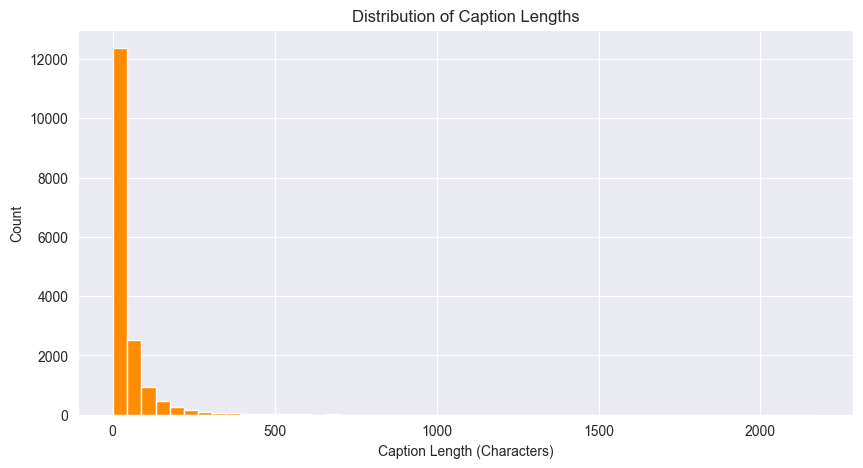

In [35]:
df['caption_length'] = df['caption'].astype(str).apply(len)
print(df['caption_length'].describe())

plt.figure(figsize=(10, 5))
df['caption_length'].hist(bins=50, color='darkorange')
plt.title('Distribution of Caption Lengths')
plt.xlabel('Caption Length (Characters)')
plt.ylabel('Count')
plt.show()

Number of hashtags found is 0


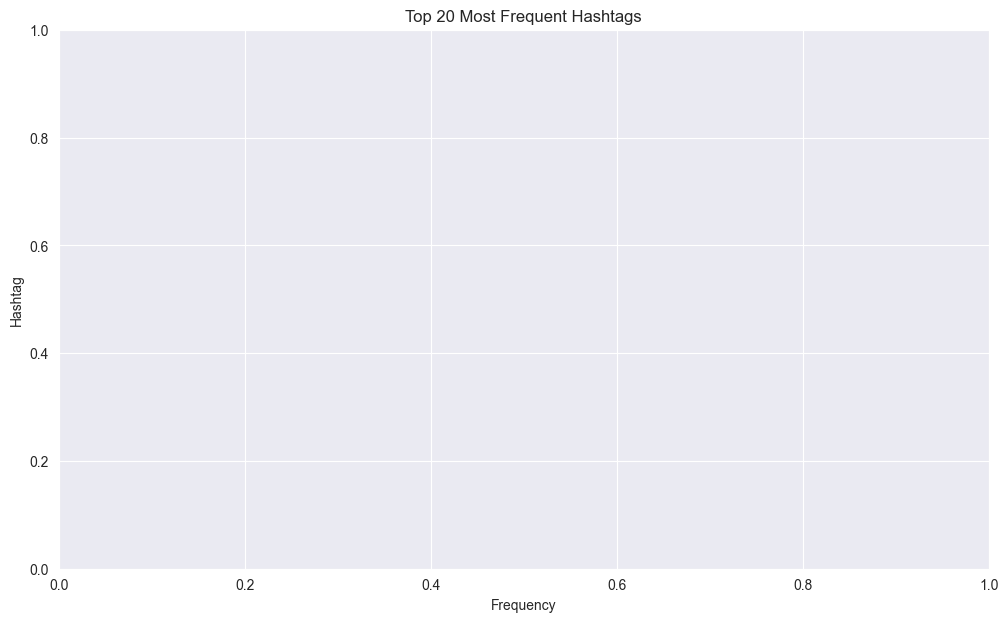

In [40]:
def extract_hashtags(caption):
    """Extracts all hashtags from a caption."""
    # Ensure caption is string and handle NaNs if any survived
    if pd.isna(caption):
        return []
    return re.findall(r"#(\w+)", str(caption).lower())

all_hashtags = [tag for caption in df['caption'] for tag in extract_hashtags(caption)]
print(f'Number of hashtags found is {len(all_hashtags)}')
common_hashtags = Counter(all_hashtags).most_common(20)

tags_df = pd.DataFrame(common_hashtags, columns=['Hashtag', 'Count'])

plt.figure(figsize=(12, 7))
sns.barplot(x='Count', y='Hashtag', data=tags_df, palette="viridis")
plt.title('Top 20 Most Frequent Hashtags')
plt.xlabel('Frequency')
plt.ylabel('Hashtag')
plt.show()
